### Desafio 1

Faça a leitura da base de dados de diabetes e realize a divisão dos dados em variáveis explicativas e variável alvo (x e y).

In [ ]:
import pandas as pd

In [ ]:
#dados do GitHub
url = 'https://raw.githubusercontent.com/Elberth-Git/Diabetes/main/diabetes%20-%20diabetes.csv.csv' #importação do banco de dados via URL
dados = pd.read_csv(url) # Carregando os dados)
display(dados)

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,167.000,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,248.000,1
3,70,45,543,30.5,158.000,1
4,60,23,846,30.1,398.000,1
...,...,...,...,...,...,...
389,88,44,510,43.3,222.000,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,766.000,0
392,76,48,180,32.9,171.000,0


In [ ]:
x = dados.drop('diabetes', axis=1)
y = dados['diabetes']

In [ ]:
print(x)

     glicemia  pressao_sanguinea  dobra_cutane_triceps  insulina      imc
0          66                 23                    94      28.1  167.000
1          40                 35                   168      43.1    2.288
2          50                 32                    88      31.0  248.000
3          70                 45                   543      30.5  158.000
4          60                 23                   846      30.1  398.000
..        ...                ...                   ...       ...      ...
389        88                 44                   510      43.3  222.000
390        88                 39                   110      36.5    1.057
391        58                 26                    16      28.4  766.000
392        76                 48                   180      32.9  171.000
393        72                 23                   112      26.2  245.000

[394 rows x 5 columns]


In [ ]:
print(y)

0      0
1      1
2      1
3      1
4      1
      ..
389    1
390    1
391    0
392    0
393    0
Name: diabetes, Length: 394, dtype: int64


### Desafio 2

Realize a divisão dos dados entre treino e teste.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

SEED = 123
np.random.seed(SEED)

x_train, test_x, y_train, test_y = train_test_split(x, y, test_size=0.25, random_state=SEED, stratify=y)

### Desafio 3

Crie 2 modelos utilizando os algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e avalie a acurácia de treino e teste, escolhendo valores para o parâmetro `max_depth` para os modelos não se especializarem demais no padrão dos dados de treino.

A Acurácia do modelo decision tree foi de 69.70 %


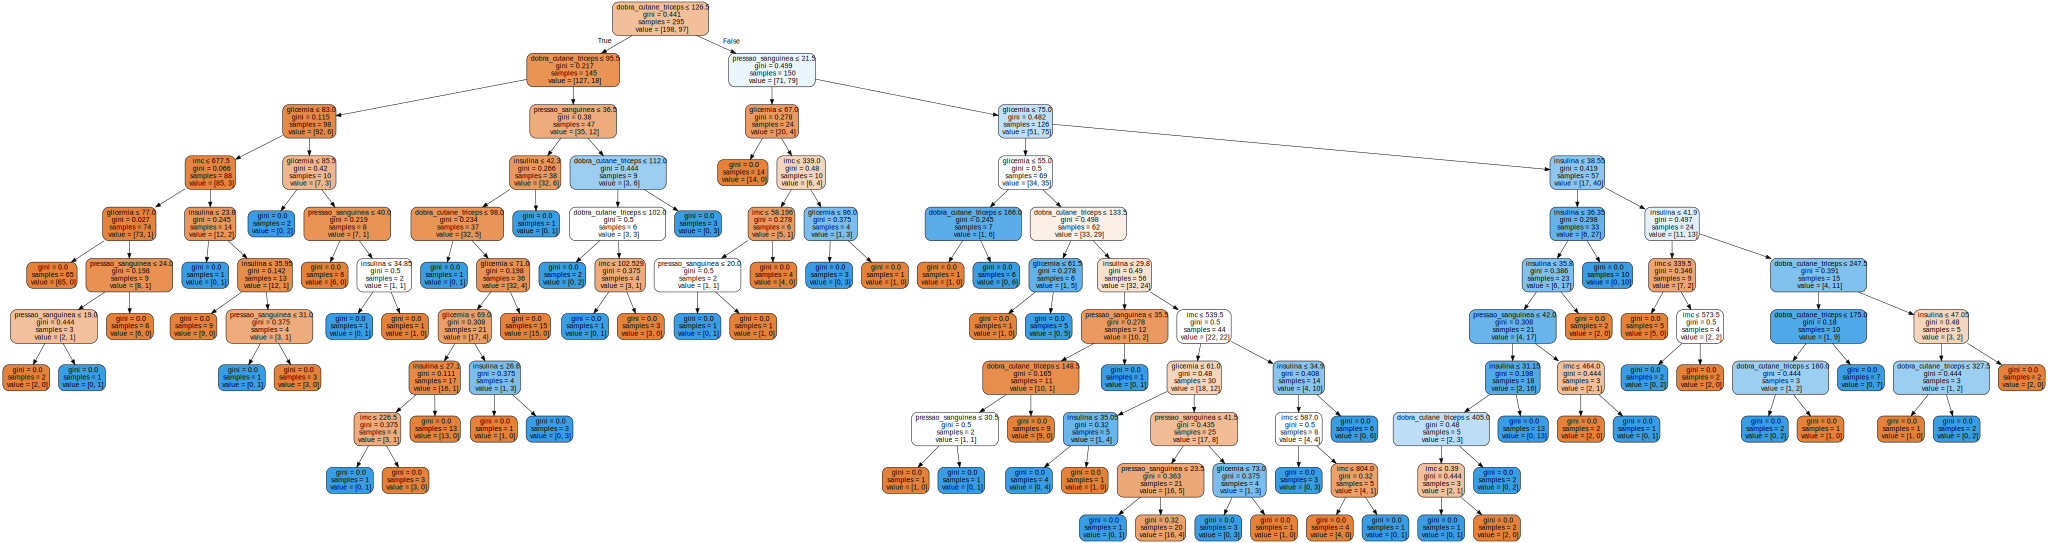

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier(max_depth=10, random_state=SEED) #Istânciando o modelo
dtc.fit(x_train, y_train)

previsoes_dtc = dtc.predict(test_x)

dtc_accuracy = dtc.score(test_x, test_y) * 100
print(f'A Acurácia do modelo decision tree foi de {dtc_accuracy:.2f} %')

#Gráfico árvore de decisão
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(dtc, out_file = None,
                           feature_names = features,
                           filled = True,
                           rounded = True,
                           special_characters=True)
grafico = graphviz.Source(dot_data)
grafico


A Acurácia do modelo random forest foi de 62.63 %


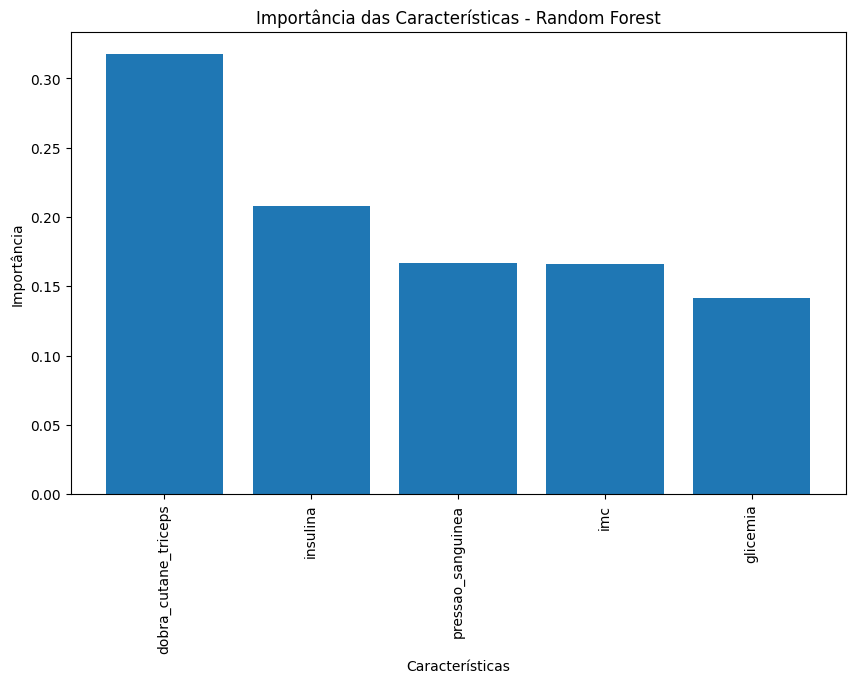

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(max_depth=10, random_state=SEED) #Istânciando o modelo
rfc.fit(x_train, y_train)

previsoes_rfc = rfc.predict(test_x)

rfc_accuracy = rfc.score(test_x, test_y) * 100
print(f'A Acurácia do modelo random forest foi de {rfc_accuracy:.2f} %')

# Plotando a importância das características
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Importância das Características - Random Forest')
plt.bar(range(x_train.shape[1]), importances[indices], align='center')
plt.xticks(range(x_train.shape[1]), [x.columns[i] for i in indices], rotation=90)
plt.xlabel('Características')
plt.ylabel('Importância')
plt.show()

In [ ]:
#Avaliando acurancia dos modelos
print(f'Acurácia do modelo Decision Tree: {dtc_accuracy:.2f}%')
print(f'Acurácia do modelo Random Forest: {rfc_accuracy:.2f}%')

Acurácia do modelo Decision Tree: 69.70%
Acurácia do modelo Random Forest: 62.63%


In [ ]:
#max_depth 3 dtc = 65.66% ; rfc = 63.64%
#max_depth 4 dtc = 64.65% ; rfc = 63.64%
#max_depth 5 dtc = 67.68% ; rfc = 63.64%
#max_depth 6 dtc = 70.71% ; rfc = 63.64%
#max_depth 7 dtc = 72.73% ; rfc = 63.64%
#max_depth 8 dtc = 71.72% ; rfc = 63.64%
#max_depth 9 dtc = 71.72% ; rfc = 63.64%
#max_depth 10 dtc = 69.70% ; rfc = 62.63%

### Desafio 4

Construa uma matriz de confusão para cada um dos modelos para avaliar o desempenho das previsões.

In [ ]:
#Matriz de confusão
from sklearn.metrics import confusion_matrix
mc_dct = confusion_matrix(test_y, previsoes_dtc) #Árvore de decisão
mc_rfc = confusion_matrix(test_y, previsoes_rfc) #Random Forest
print(mc_dct)
print(mc_rfc)

[[55 11]
 [19 14]]
[[54 12]
 [25  8]]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def gerando_matriz(matriz_confusao, labels, categorias, cmap="viridis"):
    group_counts = [f"{value}" for value in matriz_confusao.flatten()]
    labels = [f"{v1}" for v1 in labels]
    lb = [f"{v1}\n{v2}" for v1, v2 in zip(labels, group_counts)]
    lb = np.asarray(lb).reshape(matriz_confusao.shape)

    ax = plt.subplot()
    sns.set(font_scale=1.1)
    sns.heatmap(matriz_confusao, annot=lb, ax=ax, cmap=cmap, fmt="", xticklabels=categorias,yticklabels=categorias)

    label_font = {'size':'12'}
    ax.set_xlabel('Valores preditos', fontdict=label_font);
    ax.set_ylabel('Valores verdadeiros', fontdict=label_font);

    ax.tick_params(axis='both', which='major', labelsize=10)


categorias = ["0", "1"]
labels = ['Verdadeiro Negativo','Falso Positivo',
          'Falso Negativo','Verdadeiro Positivo']

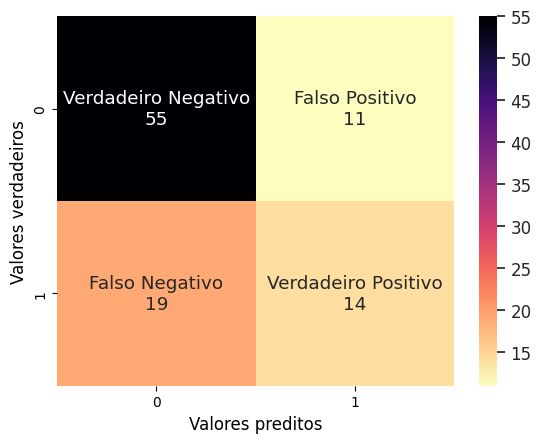

In [ ]:
gerando_matriz(mc_dct, labels, categorias, cmap="magma_r")

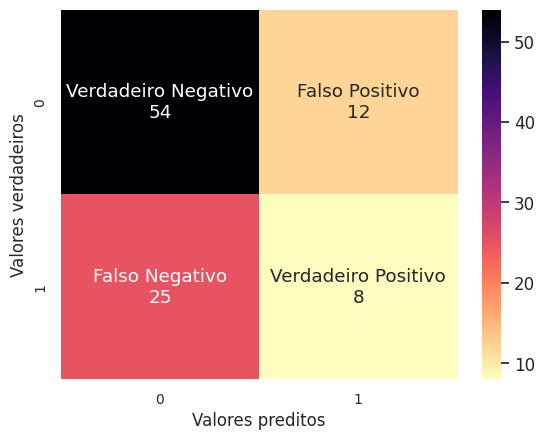

In [ ]:
gerando_matriz(mc_rfc, labels, categorias, cmap="magma_r")

## Desafio 5

Extraia as métricas acurácia, recall, precisão e F1-Score dos modelos de classificação gerados

In [ ]:
#metricas score
previsoes_dtc = dtc.predict(test_x)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f"Acurácia: {accuracy_score(test_y, previsoes_dtc)}")
print(f"Precisão: {precision_score(test_y, previsoes_dtc)}")
print(f"Recall: {recall_score(test_y, previsoes_dtc)}")
print(f"F1: {f1_score(test_y, previsoes_dtc)}")

Acurácia: 0.696969696969697
Precisão: 0.56
Recall: 0.42424242424242425
F1: 0.4827586206896552


In [ ]:
#metricas score
previsoes_rfc = rfc.predict(test_x)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f"Acurácia: {accuracy_score(test_y, previsoes_rfc)}")
print(f"Precisão: {precision_score(test_y, previsoes_rfc)}")
print(f"Recall: {recall_score(test_y, previsoes_rfc)}")
print(f"F1: {f1_score(test_y, previsoes_rfc)}")

Acurácia: 0.6262626262626263
Precisão: 0.4
Recall: 0.24242424242424243
F1: 0.30188679245283023


# Desafio 6

Obtenha a curva ROC e a métrica AUC dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

A Acurácia do modelo decision tree foi de 71.67 %


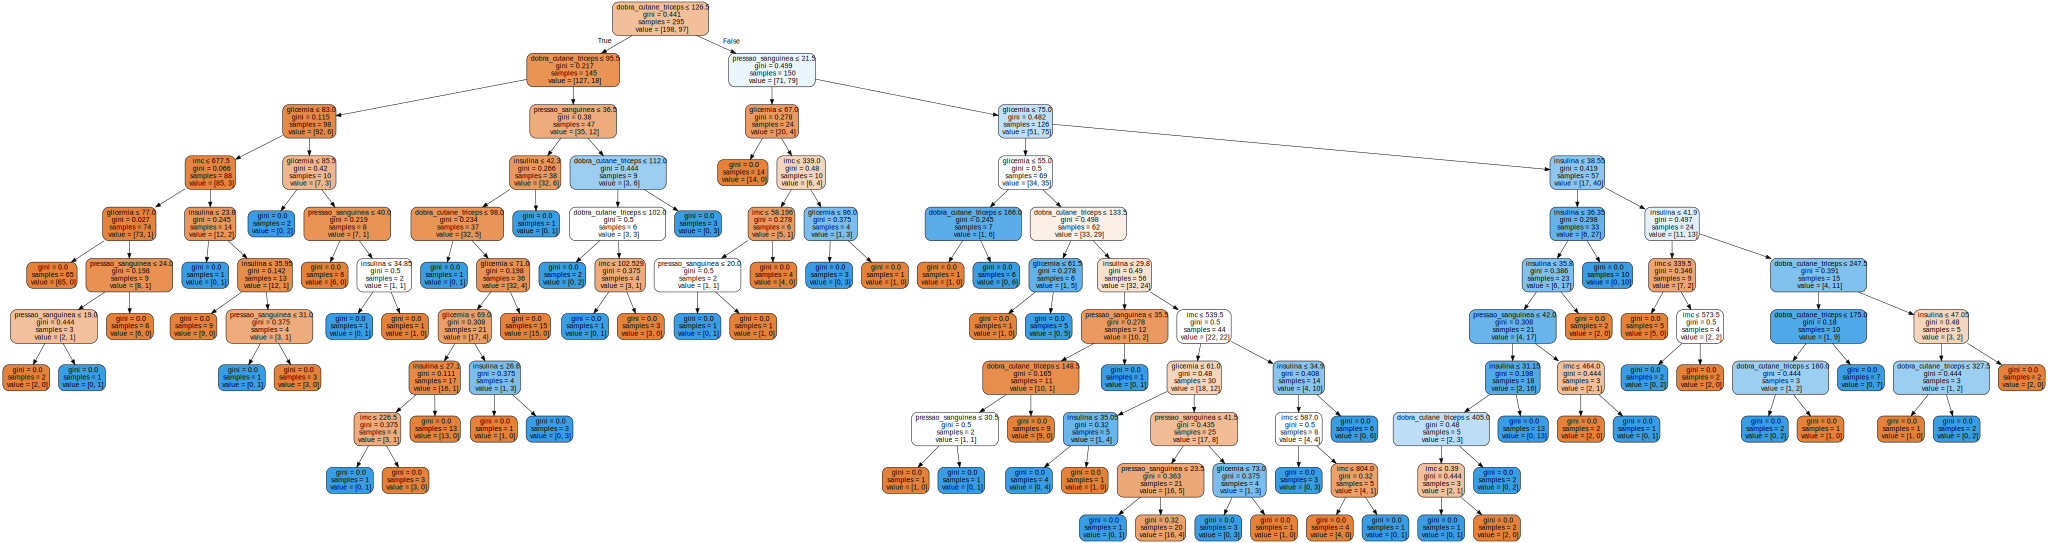

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 123
np.random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.15, random_state=SEED, stratify=y)
x_train_novo, x_validacao, y_train_novo, y_validacao = train_test_split(train_x, train_y, test_size = 0.25, random_state = SEED, stratify=train_y)

dtc = DecisionTreeClassifier(max_depth=10, random_state=SEED) #Istânciando o modelo
dtc.fit(x_train, y_train)

previsoes_dtc = dtc.predict(test_x)

dtc_accuracy = dtc.score(test_x, test_y) * 100
print(f'A Acurácia do modelo decision tree foi de {dtc_accuracy:.2f} %')

#Gráfico árvore de decisão
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(dtc, out_file = None,
                           feature_names = features,
                           filled = True,
                           rounded = True,
                           special_characters=True)
grafico = graphviz.Source(dot_data)
grafico


A Acurácia do modelo random forest foi de 66.67 %


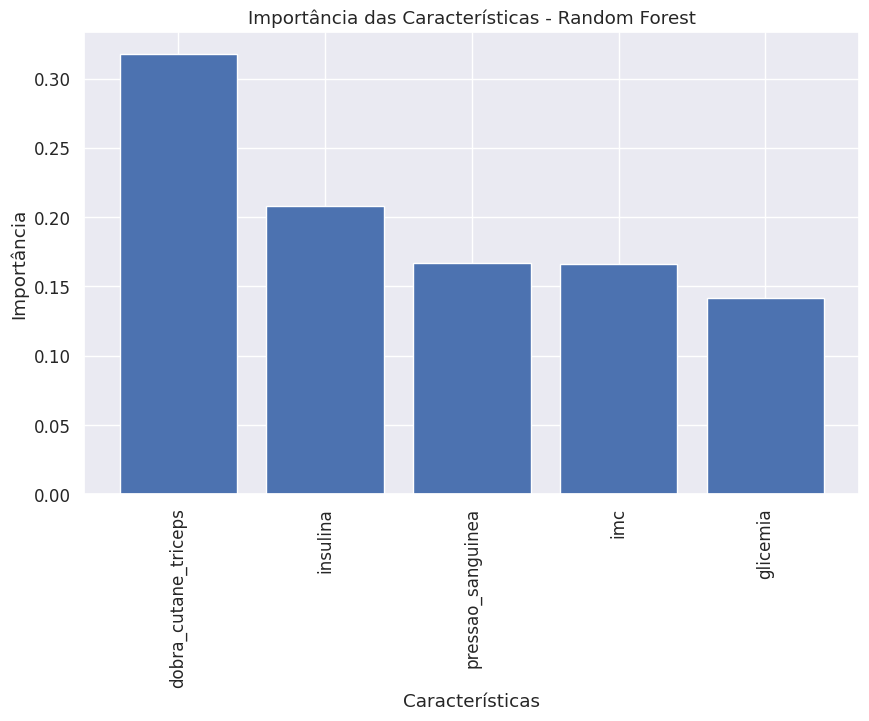

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

SEED = 123
np.random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.15, random_state=SEED, stratify=y)
x_train_novo, x_validacao, y_train_novo, y_validacao = train_test_split(train_x, train_y, test_size=0.25, random_state=SEED, stratify=train_y)

rfc = RandomForestClassifier(max_depth=10, random_state=SEED) #Istânciando o modelo
rfc.fit(x_train, y_train)

previsoes_rfc = rfc.predict(test_x)

rfc_accuracy = rfc.score(test_x, test_y) * 100
print(f'A Acurácia do modelo random forest foi de {rfc_accuracy:.2f} %')

# Plotando a importância das características
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Importância das Características - Random Forest')
plt.bar(range(x_train.shape[1]), importances[indices], align='center')
plt.xticks(range(x_train.shape[1]), [x.columns[i] for i in indices], rotation=90)
plt.xlabel('Características')
plt.ylabel('Importância')
plt.show()

### Curva ROC

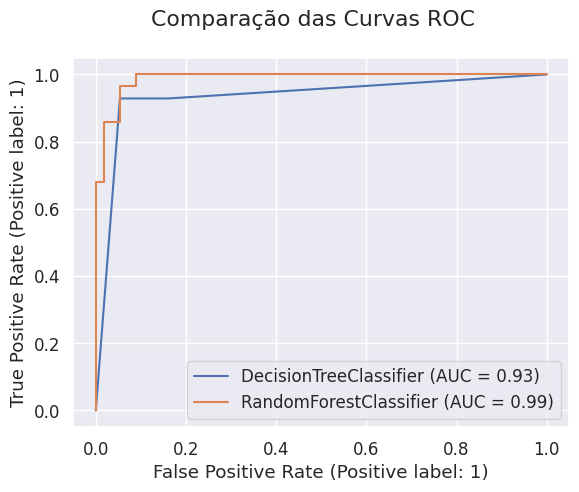

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Primeiro, plote a curva ROC para o modelo `dtc`
dtc_disp = RocCurveDisplay.from_estimator(dtc, x_validacao, y_validacao)

# Em seguida, plote a curva ROC para o modelo `rfc` no mesmo eixo
rfc_disp = RocCurveDisplay.from_estimator(rfc, x_validacao, y_validacao, ax=dtc_disp.ax_)

# Opcional: Defina um título para o gráfico
rfc_disp.figure_.suptitle("Comparação das Curvas ROC")

# Mostre o gráfico
plt.show()


### Desafio 7

Obtenha a curva precisão x recall e a métrica AP dos modelos de classificação gerados, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

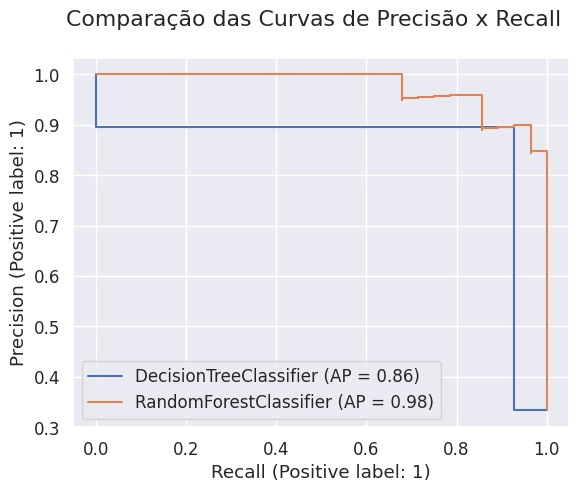

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


# Plotando a curva de Precisão x Recall para o modelo SVC
dtc_disp = PrecisionRecallDisplay.from_estimator(dtc, x_validacao, y_validacao)

# Plotando a curva de Precisão x Recall para o modelo RandomForest no mesmo eixo
rfc_disp = PrecisionRecallDisplay.from_estimator(rfc, x_validacao, y_validacao, ax=dtc_disp.ax_)

# Opcional: Definindo um título para o gráfico
rfc_disp.figure_.suptitle("Comparação das Curvas de Precisão x Recall")

# Mostrando o gráfico
plt.show()


### Desafio 8

Gere os relatórios de métricas dos modelos de classificação gerados.

In [ ]:
from sklearn.metrics import classification_report

y_pred_dtc = dtc.predict(x_validacao)
y_pred_rfc = rfc.predict(x_validacao)
print(classification_report(y_validacao, y_pred_dtc))
print(classification_report(y_validacao, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95        56
           1       0.90      0.93      0.91        28

    accuracy                           0.94        84
   macro avg       0.93      0.94      0.93        84
weighted avg       0.94      0.94      0.94        84

              precision    recall  f1-score   support

           0       0.96      0.95      0.95        56
           1       0.90      0.93      0.91        28

    accuracy                           0.94        84
   macro avg       0.93      0.94      0.93        84
weighted avg       0.94      0.94      0.94        84



### Desafio 9

Crie uma função para calcular o intervalo de confiança dos resultados de uma validação cruzada com 2 desvios padrão. A função precisa ter um parâmetro para receber uma lista com os desempenhos da validação cruzada e outro para apresentar o nome do modelo utilizado na validação cruzada. Exemplo de retorno da função:

> Intervalo de confiança ("nome do modelo"): ["valor mínimo do intervalo", "valor máximo do intervalo"]



In [ ]:
from sklearn.model_selection import KFold, cross_validate
from imblearn.over_sampling import SMOTE
import numpy as np

SEED = 123
np.random.seed(SEED)

#Separar dados de treino e teste
x = dados.drop('diabetes', axis = 1)
y = dados['diabetes']

#criar um modelo de árvore de decisão
dtc = DecisionTreeClassifier(max_depth=5, random_state=SEED) #Istanciando o modelo

#divisão dos dados de treino e validação
Kf = KFold(n_splits=5, shuffle=True, random_state=SEED)

#validacao cruzada
results = cross_validate(dtc, x, y, cv=Kf, scoring='recall')
results['test_score']

array([0.33333333, 0.66666667, 0.82142857, 0.18518519, 0.48148148])

In [ ]:
def intervalo_confianca_dtc(results):
  media = results.mean()
  desvio = results.std()
  #print(f'Intervalo de confiaça: {media} +/- {2*desvio}')
  print(f'Intervalo de confiaça modelo dtc: [{max(media - 2*desvio,0)}, {min(media+2*desvio,1)}]')

In [ ]:
def intervalo_confianca_rfc(results):
  media = results.mean()
  desvio = results.std()
  #print(f'Intervalo de confiaça: {media} +/- {2*desvio}')
  print(f'Intervalo de confiaça modelo rfc: [{max(media - 2*desvio,0)}, {min(media+2*desvio,1)}]')

In [ ]:
intervalo_confianca_dtc(results['test_score'])

Intervalo de confiaça modelo dtc: [0.04304686143078307, 0.9521912338073122]


In [ ]:
intervalo_confianca_rfc(results['test_score'])

Intervalo de confiaça modelo rfc: [0.04304686143078307, 0.9521912338073122]


### Desafio 10

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada com o método [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), usando 10 partes e embaralhando os dados antes da separação. Use o método [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) que não retorna o tempo de execução, apenas as métricas.

In [ ]:
from sklearn.model_selection import KFold, cross_validate
from imblearn.over_sampling import SMOTE
import numpy as np

SEED = 123
np.random.seed(SEED)

#Separar dados de treino e teste
x = dados.drop('diabetes', axis = 1)
y = dados['diabetes']

#criar um modelo de árvore de decisão
dtc = DecisionTreeClassifier(max_depth=10, random_state=SEED) #Istanciando o modelo

#divisão dos dados de treino e validação
Kf = KFold(n_splits=5, shuffle=True, random_state=SEED)

#validacao cruzada
results = cross_validate(dtc, x, y, cv=Kf, scoring='recall')
results['test_score']

array([0.38095238, 0.59259259, 0.67857143, 0.25925926, 0.37037037])

In [ ]:
intervalo_confianca_dtc(results['test_score'])

Intervalo de confiaça modelo dtc: [0.14668297944732367, 0.766015433251089]


In [ ]:
intervalo_confianca_rfc(results['test_score'])

Intervalo de confiaça modelo rfc: [0.14668297944732367, 0.766015433251089]


### Desafio 11

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada (`cross_val_score`) com o método [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold), usando 10 partes e embaralhando os dados antes da separação e avaliando a métrica F1-Score.

In [ ]:
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.model_selection import StratifiedKFold

SEED = 5
np.random.seed(SEED)

#Separar dados de treino e teste
X = dados.drop('diabetes', axis = 1)
y = dados['diabetes']

#validacao cruzada
dtc = DecisionTreeClassifier(max_depth=5, random_state=SEED) #modelo #criar um modelo de árvore de decisão

#divisão dos dados de treino e validação para cross validacao
Kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)

#validacao cruzada
results = cross_validate(dtc, X, y, cv=Kf, scoring=['f1'])
results['test_f1']

array([0.4       , 0.58333333, 0.70967742, 0.38461538, 0.33333333,
       0.48      , 0.48275862, 0.64285714, 0.51851852, 0.53333333])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_validate
import numpy as np

SEED = 123
np.random.seed(SEED)

#Separar dados de treino e teste
X = dados.drop('diabetes', axis = 1)
y = dados['diabetes']

#Criando modelo
rfc = RandomForestClassifier(max_depth=5, random_state=SEED) #Istânciando o modelo
rfc.fit(x_train, y_train)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)

#Validação cruzada
results = cross_validate(rfc, X, y, cv=Kf, scoring=['f1'])
results['test_f1']

array([0.69565217, 0.52173913, 0.59259259, 0.53846154, 0.43478261,
       0.61538462, 0.42105263, 0.5       , 0.54545455, 0.44444444])

### Desafio 12

Avalie o desempenho dos modelos utilizando a validação cruzada (`cross_val_score`) com o método [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

O método LeaveOneOut vai gerar um modelo para cada uma das linhas da base de dados, portanto a lista de resultados terá taxa de acerto apenas de 0 ou 1 para cada modelo. Dessa forma, extraia apenas a média do resultado, sem utilizar o intervalo de confiança.


In [ ]:
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Preparando os dados
X = dados.drop('diabetes', axis=1)
y = dados['diabetes']

# Criando o objeto LeaveOneOut
loo = LeaveOneOut()

# Criando o modelo de árvore de decisão
dtc = DecisionTreeClassifier(max_depth=5, random_state=SEED)

# Validação cruzada utilizando LeaveOneOut com acurácia
scores = cross_val_score(dtc, X, y, cv=loo, scoring='accuracy')

# Extraindo a média da acurácia
mean_score = scores.mean()

print(f'Média da acurácia: {(mean_score * 100):.2f}%')

Média da acurácia: 62.94%


In [ ]:
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Preparando os dados
X = dados.drop('diabetes', axis=1)
y = dados['diabetes']

# Criando o objeto LeaveOneOut
loo = LeaveOneOut()

# Criando o modelo de árvore de decisão
rtc = RandomForestClassifier(max_depth=5, random_state=SEED)

# Validação cruzada utilizando LeaveOneOut com acurácia
scores = cross_val_score(rtc, X, y, cv=loo, scoring='accuracy')

# Extraindo a média da acurácia
mean_score = scores.mean()

print(f'Média da acurácia: {(mean_score * 100):.2f}%')

Média da acurácia: 69.04%


### Desafio 13

Verifique a proporção de dados da variável alvo do conjunto de dados de diabetes. Essa análise pode ser feita a partir da porcentagem de dados ou com a utilização de um gráfico de contagem para entender se há um desbalanceamento de dados.

Proporção de cada classe na variável alvo:
diabetes
0    67.005076
1    32.994924
Name: proportion, dtype: float64


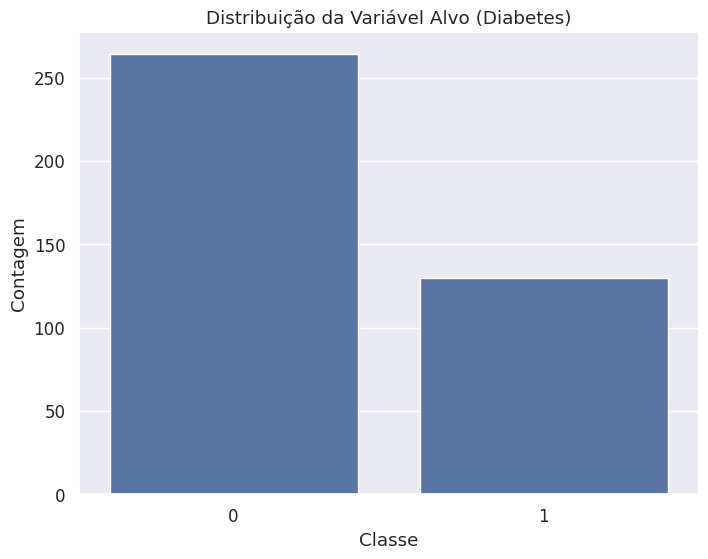

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preparando os dados
X = dados.drop('diabetes', axis=1)
y = dados['diabetes']

# Calculando a porcentagem de cada classe
class_distribution = y.value_counts(normalize=True) * 100
print("Proporção de cada classe na variável alvo:")
print(class_distribution)

# Criando o gráfico de contagem
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Distribuição da Variável Alvo (Diabetes)')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()


### Desafio 14

Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o oversampling com [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

### Oversample

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import make_pipeline # Import the correct make_pipeline
import numpy as np

dtc = DecisionTreeClassifier(max_depth=5, random_state=SEED)

SEED = 5
np.random.seed(SEED)

X = dados.drop('diabetes', axis=1)
y = dados['diabetes']

# Definindo StratifiedKFold para validação cruzada
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)

# Criando o pipeline com SMOTE e modelo de árvore de decisão
# Use make_pipeline from imblearn.pipeline
pipeline = make_pipeline(
    SMOTE(random_state=SEED),
    dtc)

# Realizando a validação cruzada com StratifiedKFold e obtendo a média do F1-Score
scores = cross_val_score(pipeline, X, y, cv=skf, scoring='f1')

# Calculando a média do F1-Score
mean_f1_score = scores.mean()

print(f'Média do F1-Score: {(mean_f1_score)*100:.2f}%')

Média do F1-Score: 54.14%


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import make_pipeline # Import the correct make_pipeline
import numpy as np

rtc = RandomForestClassifier(max_depth=5, random_state=SEED)

SEED = 5
np.random.seed(SEED)

X = dados.drop('diabetes', axis=1)
y = dados['diabetes']

# Definindo StratifiedKFold para validação cruzada
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)

# Criando o pipeline com SMOTE e modelo de árvore de decisão
# Use make_pipeline from imblearn.pipeline
pipeline = make_pipeline(
    SMOTE(random_state=SEED),
    rfc)

# Realizando a validação cruzada com StratifiedKFold e obtendo a média do F1-Score
scores = cross_val_score(pipeline, X, y, cv=skf, scoring='f1')

# Calculando a média do F1-Score
mean_f1_score = scores.mean()

print(f'Média do F1-Score: {(mean_f1_score)*100:.2f}%')

Média do F1-Score: 61.21%


### Desafio 15

 Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o undersampling com [`Nearmiss`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) na sua versão 3, obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [ ]:
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import make_pipeline # Import make_pipeline from imblearn
import numpy as np

SEED = 5
np.random.seed(SEED)

# Preparando os dados
X = dados.drop('diabetes', axis=1)
y = dados['diabetes']

# Definindo StratifiedKFold para validação cruzada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# Criando o pipeline com NearMiss (versão 3) e modelo de árvore de decisão
# Use make_pipeline from imblearn.pipeline to handle samplers
pipeline = make_pipeline(
    NearMiss(version=3),
    DecisionTreeClassifier(max_depth=5, random_state=SEED)
)

# Realizando a validação cruzada com StratifiedKFold e obtendo a média do F1-Score
scores = cross_val_score(pipeline, X, y, cv=skf, scoring='f1')

# Calculando a média do F1-Score
mean_f1_score = scores.mean()

print(f'Média do F1-Score com DecisionTreeClassifier: {(mean_f1_score*100):.4f}%')

Média do F1-Score com DecisionTreeClassifier: 51.5524%


In [ ]:
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import make_pipeline # Import make_pipeline from imblearn
import numpy as np

SEED = 5
np.random.seed(SEED)

# Preparando os dados
X = dados.drop('diabetes', axis=1)
y = dados['diabetes']

# Definindo StratifiedKFold para validação cruzada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# Criando o pipeline com NearMiss (versão 3) e modelo de floresta aleatória
# Use make_pipeline from imblearn.pipeline to handle samplers
pipeline = make_pipeline(
    NearMiss(version=3),
    RandomForestClassifier(random_state=SEED)
)

# Realizando a validação cruzada com StratifiedKFold e obtendo a média do F1-Score
scores = cross_val_score(pipeline, X, y, cv=skf, scoring='f1')

# Calculando a média do F1-Score
mean_f1_score = scores.mean()

print(f'Média do F1-Score com RandomForestClassifier: {(mean_f1_score*100):.2f}%')

Média do F1-Score com RandomForestClassifier: 54.14%


### Desafio 16

Escolha o modelo que obteve o melhor desempenho ao comparar as estratégias de oversampling e undersampling e realize o teste do modelo nos dados de teste que foram separados no início dos desafios.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
# Use imblearn Pipeline
from imblearn.pipeline import Pipeline # Changed from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, recall_score

# Preparando os dados
X = dados.drop('diabetes', axis=1)
y = dados['diabetes']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED, stratify=y)

# Definindo StratifiedKFold para validação cruzada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# Criando o pipeline com SMOTE e RandomForestClassifier
# Use Pipeline from imblearn to handle samplers
pipeline = Pipeline([
    ('smote', SMOTE(random_state=SEED)),
    ('rfc', RandomForestClassifier(random_state=SEED))
])

# Realizando a validação cruzada com StratifiedKFold e obtendo a média do F1-Score
scores = cross_val_score(pipeline, X, y, cv=skf, scoring='f1')

# Calculando a média do F1-Score
mean_f1_score = scores.mean()

print(f'Média do F1-Score com RandomForestClassifier e SMOTE: {mean_f1_score:.4f}')

# Ajustando o modelo final com todos os dados de treino
pipeline.fit(X_train, y_train)

# Avaliando o modelo final com dados de teste
previsoes = pipeline.predict(X_test)
f1_test = f1_score(y_test, previsoes)
recall_test = recall_score(y_test, previsoes)

print(f'F1-Score no conjunto de teste: {f1_test:.4f}')
print(f'Recall no conjunto de teste: {recall_test:.4f}')

Média do F1-Score com RandomForestClassifier e SMOTE: 0.5617
F1-Score no conjunto de teste: 0.5542
Recall no conjunto de teste: 0.5897


In [ ]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline # Use Pipeline from imblearn
from sklearn.metrics import f1_score, recall_score

# Preparando os dados
X = dados.drop('diabetes', axis=1)
y = dados['diabetes']

# Definindo StratifiedKFold para validação cruzada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# Criando o pipeline com SMOTE e RandomForestClassifier
# Use imblearn.pipeline.Pipeline to handle SMOTE correctly
pipeline = Pipeline([
    ('smote', SMOTE(random_state=SEED)),
    ('rfc', RandomForestClassifier(random_state=SEED))
])

# Realizando a validação cruzada com StratifiedKFold e obtendo a média do F1-Score
scores = cross_val_score(pipeline, X, y, cv=skf, scoring='f1')

# Calculando a média do F1-Score
mean_f1_score = scores.mean()

print(f'Média do F1-Score com RandomForestClassifier e SMOTE: {mean_f1_score:.4f}')

# Ajustando o modelo final com todos os dados de treino
pipeline.fit(train_x, train_y)

# Avaliando o modelo final com dados de teste
previsoes = pipeline.predict(test_x)
f1_test = f1_score(test_y, previsoes)
recall_test = recall_score(test_y, previsoes)

print(f'F1-Score no conjunto de teste: {(f1_test*100):.2f}')
print(f'Recall no conjunto de teste: {(recall_test*100):.2f}')

Média do F1-Score com RandomForestClassifier e SMOTE: 0.5617
F1-Score no conjunto de teste: 50.00
Recall no conjunto de teste: 50.00
